# Partical Work 06 - Logistic Regression
- Author: *Romain Claret*
- Due-date: *29.10.2018*

## Exerice 1 - Classification to predict student admission

### a) Logistic regression classifier with linear decision boundary
a)

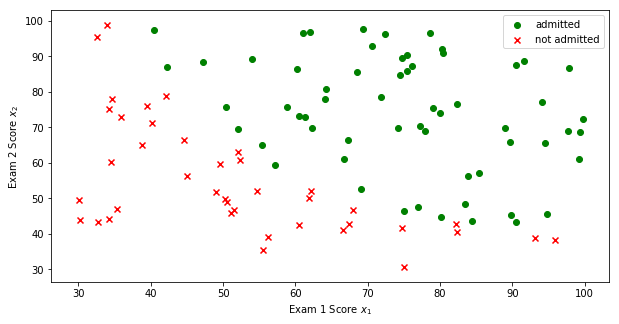

shape of X: (100, 3)
shape of y: (100,)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


col_id = ['x1', 'x2', 'y']
data_train = pd.read_csv('student-dataset-train.csv', names=col_id)
#print(data_train.head(3))

x1 = data_train['x1'].values
x2 = data_train['x2'].values
y = data_train['y'].values
N = len(y)

X = np.matrix([np.ones(len(y)), x1, x2]).T

x1_pos = [x1[i] for i in range(N) if y[i] == 1]
x2_pos = [x2[i] for i in range(N) if y[i] == 1]
x1_neg = [x1[i] for i in range(N) if y[i] == 0]
x2_neg = [x2[i] for i in range(N) if y[i] == 0]

plt.figure(figsize=(10, 5))
plt_pos = plt.scatter(x1_pos, x2_pos, marker="o", label="pass", color="green")
plt_neg = plt.scatter(x1_neg, x2_neg, marker="x", label="fail", color="red")
plt.legend((plt_pos,plt_neg),("admitted","not admitted"),loc='upper right')
plt.xlabel("Exam 1 Score $x_1$")
plt.ylabel("Exam 2 Score $x_2$")
plt.show()

print("shape of X:", X.shape)
print("shape of y:", y.shape)

b) Implement a z-norm normalization of the training set. You need to store the normaliza-
tion values (μ, σ) for later as they will be needed to normalize the test set.

In [2]:
X_mu = np.mean(X)
X_sigma = np.std(X)
X_normalized = (X-X_mu)/X_sigma
X = X_normalized

print("mu:", X_mu)
print("sigma:", X_sigma)
#print("z-normalisation:", X_normalized)

mu: 44.28875738181337
sigma: 34.29161449115459


c)

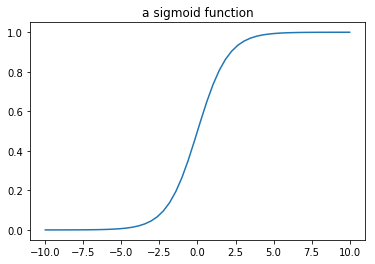

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.linspace(-10, 10)

plt.plot(z, sigmoid(z))
plt.title("a sigmoid function")
plt.show()

d)

In [4]:
def h_theta(X, theta):
    return sigmoid(X.dot(np.matrix(theta).T))

e)

In [5]:
def J_theta(X, y, theta):
    epsilon = 1e-6
    h = h_theta(X, theta)
    N = X.shape[0]
    tmp = y * np.log(h + epsilon)+(1 - y)*np.log(1 - h + epsilon)
    return np.sum(tmp) / N

f)

In [51]:
def gradientAscend(X, y, learning_rate, num_epoch):
    N, D = X.shape
    theta = np.zeros(D)
    J = []
    
    for i in range(num_epoch):
        for t in range(D):
            cost = 0
            for j in range(N):
                cost += -J_theta(X, y, theta)
                cost *= learning_rate * 1.0 / N
                theta[t] -= cost
        J.append(cost)
        if i % 1000 == 0:
            print("i:",i,"theta:",theta)
            print("i:",i,"cost:",J[-3:])
    return theta, J

g)

for learning_rate: 0.001 and num_epoch: 10000
i: 0 theta: [-0.00069311 -0.00069314 -0.00069329]
i: 0 cost: [6.933546583771099e-06]
i: 1000 theta: [-0.82274768 -0.82279785 -0.8229952 ]
i: 1000 cost: [9.830149730805568e-06, 9.83416314913738e-06, 9.838179378051583e-06]
i: 2000 theta: [-2.06361086 -2.06377346 -2.06434057]
i: 2000 cost: [1.5643740277281382e-05, 1.5651815444514416e-05, 1.565989617641608e-05]
i: 3000 theta: [-4.14235888 -4.14275677 -4.14402945]
i: 3000 cost: [2.717345093763479e-05, 2.7189215687561314e-05, 2.7204990664496277e-05]
i: 4000 theta: [-7.84763504 -7.84848969 -7.85107664]
i: 4000 cost: [4.907151376958706e-05, 4.910015158027806e-05, 4.912880062380651e-05]
i: 5000 theta: [-14.25522856 -14.2566425  -14.26107146]
i: 5000 cost: [7.855026882630182e-05, 7.857583738117764e-05, 7.8601388014476e-05]
i: 6000 theta: [-23.09682401 -23.09855134 -23.10411871]
i: 6000 cost: [9.563409540466446e-05, 9.564427313206512e-05, 9.56544409128637e-05]
i: 7000 theta: [-33.04497073 -33.04656274

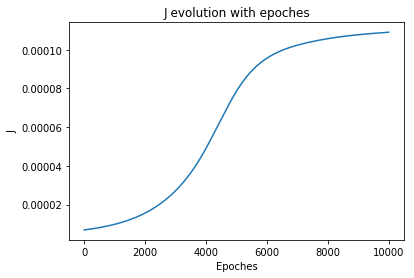

In [52]:
learning_rate = 1e-3
num_epoch = 10000
print("for learning_rate:", learning_rate, "and num_epoch:",num_epoch)
theta, J = gradientAscend(X, y, learning_rate, num_epoch)
print("final theta:",theta)
print("final cost:",J[-3:])

plt.plot(range(num_epoch), J)
plt.title("J evolution with epoches")
plt.xlabel("Epoches")
plt.ylabel("J")
plt.show()

h) This is more than likely wrong

In [53]:
col_id = ['x1', 'x2', 'y']
data_test = pd.read_csv('student-dataset-test.csv', names=col_id)

x1_test = data_test['x1'].values
x2_test = data_test['x2'].values
y_test = data_test['y'].values
N_test = len(y)

X_test = np.matrix([np.ones(len(y_test)), x1_test, x2_test]).T

true_prediction = 0
for i in range(N_test):
    p_1 = h_theta(X_test[i], theta)
    guess = 0
    if p_1 >= 0.5:
        guess = 1
    if y_test[i] == guess:
        true_prediction += 1

print("Performance: ", true_prediction / N)
print("Error rate: ", (N_test - true_prediction) / N)

Performance:  0.5
Error rate:  0.5


i) this is so wrong

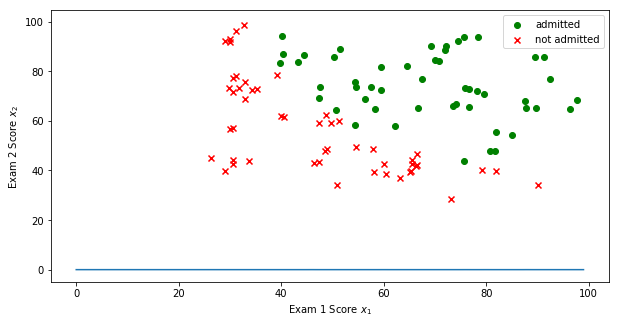

In [9]:
x1_pos_test = [x1_test[i] for i in range(N_test) if y_test[i] == 1]
x2_pos_test = [x2_test[i] for i in range(N_test) if y_test[i] == 1]
x1_neg_test = [x1_test[i] for i in range(N_test) if y_test[i] == 0]
x2_neg_test = [x2_test[i] for i in range(N_test) if y_test[i] == 0]

plt.figure(figsize=(10, 5))

plt.plot(range(N_test), h_theta(X_test, theta))

plt_pos_test = plt.scatter(x1_pos_test, x2_pos_test, marker="o", label="pass", color="green")
plt_neg_test = plt.scatter(x1_neg_test, x2_neg_test, marker="x", label="fail", color="red")
plt.legend((plt_pos_test,plt_neg_test),("admitted","not admitted"),loc='upper right')
plt.xlabel("Exam 1 Score $x_1$")
plt.ylabel("Exam 2 Score $x_2$")
plt.show()

j) It's clear I did some mistakes here.

### c. Logistic regression classifier with non-linear decision boundary
don't work :(

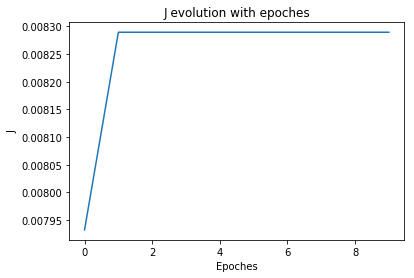

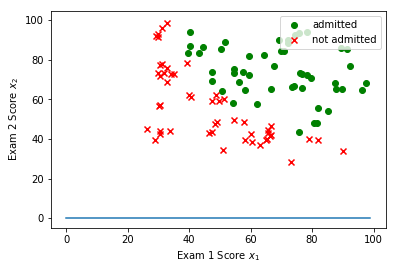

In [10]:
x1_complex = data_train['x1'].values
x2_complex = data_train['x2'].values
x1_2_complex = np.square(x1)
x2_2_complex = np.square(x2)
x1_x2_complex = x1*x2
y_complex = data_train['y'].values
N_complex = len(y)

X_complex = np.matrix([np.ones(len(y_complex)),
                       x1_complex, 
                       x2_complex, 
                       x1_2_complex, 
                       x2_2_complex, 
                       x1_x2_complex]).T

learning_rate_complex = 1e-3
num_epoch_complex = 10
theta_complex, J_complex = gradientAscend(X_complex, y_complex, learning_rate_complex, num_epoch_complex)

plt.plot(range(len(J_complex)), J_complex)
plt.title("J evolution with epoches")
plt.xlabel("Epoches")
plt.ylabel("J")
plt.show()

#plt.figure(figsize=(10, 5))

plt.plot(range(N_test), h_theta(X_complex, theta_complex))

plt_pos_test = plt.scatter(x1_pos_test, x2_pos_test, marker="o", label="pass", color="green")
plt_neg_test = plt.scatter(x1_neg_test, x2_neg_test, marker="x", label="fail", color="red")
plt.legend((plt_pos_test,plt_neg_test),("admitted","not admitted"),loc='upper right')
plt.xlabel("Exam 1 Score $x_1$")
plt.ylabel("Exam 2 Score $x_2$")
plt.show()

### d. Using SciKit Learn
interesting result, it's the same score/prediction than with my defective testing above.

In [11]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss="log", penalty="l2", max_iter=1000, tol=1e-3)
reg = model.fit(X, y)
print(reg.score(X_test, y_test))
print(reg.predict(X_test))

0.5
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


I need to check the solution, I am missing something here...